# Prediction of Movie Genres from the Movie Plots

---
## 1. Introduction

## Why we choose this as our problem?

* We would like to explore more about natural language processing.
* We would also like to test out whether machines are able to intepret human language and use it for analysis.

## Our Dataset

The data we used is from Kaggle and it contains the relevant details of the movies including the overview of the movie which is the plot of the movie. 

The dataset contains 4803 movies and the informations found are as below:

    1. Budget: Money spent on the movie
    2. Genres: Genres of the movie
    3. Homepage: Original website of the movie
    4. id: Unique ID given to the movie
    5. Keywords: Special words in the overview
    6. Original language: Language of the movie
    7. Original title: Title of the movie
    8. Overview: Summary and plot of the movie
    9. Popularity: Popularity scores of the movies
    10. Production companies: Name of production company
    11. Production countries: Country of the production
    12. Release Date: Date of movie release
    13. Revenue: Money earned from the movie
    14. Runtime: Duration of the movie in minutes
    15. Spoken language: Language spoken in the movie
    16. Status: The movie status
    17. Tagline: A short sentence describing the movie
    18. Title: Title of the movie
    19. Vote average: Average votes of the movie (Max limit of 10)
    20. Vote count: Number of voters

## Import necessary libraries and packages

In [51]:
import numpy as np
import pandas as pd
import seaborn as sb
sb.set()
import matplotlib.pyplot as plt 
import re
import nltk
import string
from nltk.corpus import stopwords
from nltk import word_tokenize, FreqDist
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud, STOPWORDS
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
import itertools

ModuleNotFoundError: No module named 'wordcloud'

## Import dataset to pandas from csv file

In [5]:
movies = pd.read_csv("tmdb_5000_movies.csv")
movies.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"{id: 28, name: Action}, {id: 12, name: Adventu...",http://www.avatarmovie.com/,19995,"{id: 1463, name: culture clash}, {id: 2964, na...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"{name: Ingenious Film Partners, id: 289}, {nam...","{iso_3166_1: US, name: United States of Americ...",10/12/2009,2787965087,162.0,"{iso_639_1: en, name: English}, {iso_639_1: es...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"{id: 12, name: Adventure}, {id: 14, name: Fant...",http://disney.go.com/disneypictures/pirates/,285,"{id: 270, name: ocean}, {id: 726, name: drug a...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"{name: Walt Disney Pictures, id: 2}, {name: Je...","{iso_3166_1: US, name: United States of America}",19/5/2007,961000000,169.0,"{iso_639_1: en, name: English}",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"{id: 28, name: Action}, {id: 12, name: Adventu...",http://www.sonypictures.com/movies/spectre/,206647,"{id: 470, name: spy}, {id: 818, name: based on...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"{name: Columbia Pictures, id: 5}, {name: Danja...","{iso_3166_1: GB, name: United Kingdom}, {iso_3...",26/10/2015,880674609,148.0,"{iso_639_1: fr, name: Fran\u00e7ais}, {iso_639...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"{id: 28, name: Action}, {id: 80, name: Crime},...",http://www.thedarkknightrises.com/,49026,"{id: 849, name: dc comics}, {id: 853, name: cr...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"{name: Legendary Pictures, id: 923}, {name: Wa...","{iso_3166_1: US, name: United States of America}",16/7/2012,1084939099,165.0,"{iso_639_1: en, name: English}",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"{id: 28, name: Action}, {id: 12, name: Adventu...",http://movies.disney.com/john-carter,49529,"{id: 818, name: based on novel}, {id: 839, nam...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"{name: Walt Disney Pictures, id: 2}","{iso_3166_1: US, name: United States of America}",7/3/2012,284139100,132.0,"{iso_639_1: en, name: English}",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [6]:
movies.shape

(4803, 20)

In [7]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4775 non-null   object 
 2   homepage              1712 non-null   object 
 3   id                    4803 non-null   int64  
 4   keywords              4391 non-null   object 
 5   original_language     4803 non-null   object 
 6   original_title        4803 non-null   object 
 7   overview              4800 non-null   object 
 8   popularity            4803 non-null   float64
 9   production_companies  4452 non-null   object 
 10  production_countries  4629 non-null   object 
 11  release_date          4802 non-null   object 
 12  revenue               4803 non-null   int64  
 13  runtime               4801 non-null   float64
 14  spoken_languages      4717 non-null   object 
 15  status               

In [8]:
movies.dtypes

budget                    int64
genres                   object
homepage                 object
id                        int64
keywords                 object
original_language        object
original_title           object
overview                 object
popularity              float64
production_companies     object
production_countries     object
release_date             object
revenue                   int64
runtime                 float64
spoken_languages         object
status                   object
tagline                  object
title                    object
vote_average            float64
vote_count                int64
dtype: object

## 2. Preliminary Data Cleaning 

For data cleaning, we cleaned the column of `genres` and `overview` as both of the columns will be used for Machine Learning .

### Cleaning of the genres column

`genres` column is much harder to clean as it consists of a few dictionaries. We used the `str.split()` method to split them off by the delimiters `"," , ":" , "}"`.

In [9]:
movies_genres = pd.DataFrame(movies['genres'])
movies_genres.head()

,genres
0,"{id: 28, name: Action}, {id: 12, name: Adventu..."
1,"{id: 12, name: Adventure}, {id: 14, name: Fant..."
2,"{id: 28, name: Action}, {id: 12, name: Adventu..."
3,"{id: 28, name: Action}, {id: 80, name: Crime},..."
4,"{id: 28, name: Action}, {id: 12, name: Adventu..."


In [10]:
movies_genres = movies['genres'].str.split(",",expand = True)
movies_genres

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,{id: 28,name: Action},{id: 12,name: Adventure},{id: 14,name: Fantasy},{id: 878,name: Science Fiction},None,None,None,None,None,None
1,{id: 12,name: Adventure},{id: 14,name: Fantasy},{id: 28,name: Action},None,None,None,None,None,None,None,None
2,{id: 28,name: Action},{id: 12,name: Adventure},{id: 80,name: Crime},None,None,None,None,None,None,None,None
3,{id: 28,name: Action},{id: 80,name: Crime},{id: 18,name: Drama},{id: 53,name: Thriller},None,None,None,None,None,None
4,{id: 28,name: Action},{id: 12,name: Adventure},{id: 878,name: Science Fiction},None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4798,{id: 28,name: Action},{id: 80,name: Crime},{id: 53,name: Thriller},None,None,None,None,None,None,None,None
4799,{id: 35,name: Comedy},{id: 10749,name: Romance},None,None,None,None,None,None,None,None,None,None
4800,{id: 35,name: Comedy},{id: 18,name: Drama},{id: 10749,name: Romance},{id: 10770,name: TV Movie},None,None,None,None,None,None
4801,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Each of the movies has a lot of genres, and it is hard to analyse multiple genres based on one story overview. In fact, the genres are not arranged in the form of alphabetical order or the order of id, hence there is definitely a reason for arrange it in this order. Therefore, we only take the **first genre** for analysis. 

In [11]:
movies_genres = movies_genres[1].str.split(": ",expand = True)
movies_genres

,0,1
0,name,Action}
1,name,Adventure}
2,name,Action}
3,name,Action}
4,name,Action}
...,...,...
4798,name,Action}
4799,name,Comedy}
4800,name,Comedy}
4801,NaN,NaN


In [12]:
movies_genres = movies_genres[1].str.split("}",expand = True)
movies_genres

,0,1
0,Action,
1,Adventure,
2,Action,
3,Action,
4,Action,
...,...,...
4798,Action,
4799,Comedy,
4800,Comedy,
4801,NaN,NaN


In [13]:
movies_genres.rename(columns = {0:'Main_genres'})

,Main_genres,1
0,Action,
1,Adventure,
2,Action,
3,Action,
4,Action,
...,...,...
4798,Action,
4799,Comedy,
4800,Comedy,
4801,NaN,NaN


We then concatenate the cleaned genres into the main movies dataset.

In [14]:
movies_clean = pd.concat([movies,movies_genres],axis=1)
movies_clean

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,0,1
0,237000000,"{id: 28, name: Action}, {id: 12, name: Adventu...",http://www.avatarmovie.com/,19995,"{id: 1463, name: culture clash}, {id: 2964, na...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"{name: Ingenious Film Partners, id: 289}, {nam...",...,2787965087,162.0,"{iso_639_1: en, name: English}, {iso_639_1: es...",Released,Enter the World of Pandora.,Avatar,7.2,11800,Action,
1,300000000,"{id: 12, name: Adventure}, {id: 14, name: Fant...",http://disney.go.com/disneypictures/pirates/,285,"{id: 270, name: ocean}, {id: 726, name: drug a...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"{name: Walt Disney Pictures, id: 2}, {name: Je...",...,961000000,169.0,"{iso_639_1: en, name: English}",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,Adventure,
2,245000000,"{id: 28, name: Action}, {id: 12, name: Adventu...",http://www.sonypictures.com/movies/spectre/,206647,"{id: 470, name: spy}, {id: 818, name: based on...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"{name: Columbia Pictures, id: 5}, {name: Danja...",...,880674609,148.0,"{iso_639_1: fr, name: Fran\u00e7ais}, {iso_639...",Released,A Plan No One Escapes,Spectre,6.3,4466,Action,
3,250000000,"{id: 28, name: Action}, {id: 80, name: Crime},...",http://www.thedarkknightrises.com/,49026,"{id: 849, name: dc comics}, {id: 853, name: cr...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"{name: Legendary Pictures, id: 923}, {name: Wa...",...,1084939099,165.0,"{iso_639_1: en, name: English}",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,Action,
4,260000000,"{id: 28, name: Action}, {id: 12, name: Adventu...",http://movies.disney.com/john-carter,49529,"{id: 818, name: based on novel}, {id: 839, nam...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"{name: Walt Disney Pictures, id: 2}",...,284139100,132.0,"{iso_639_1: en, name: English}",Released,"Lost in our world, found in another.",John Carter,6.1,2124,Action,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4798,220000,"{id: 28, name: Action}, {id: 80, name: Crime},...",NaN,9367,"{id: 5616, name: united states\u2013mexico bar...",es,El Mariachi,El Mariachi just wants to play his guitar and ...,14.269792,"{name: Columbia Pictures, id: 5}",...,2040920,81.0,"{iso_639_1: es, name: Espa\u00f1ol}",Released,"He didn't come looking for trouble, but troubl...",El Mariachi,6.6,238,Action,
4799,9000,"{id: 35, name: Comedy}, {id: 10749, name: Roma...",NaN,72766,NaN,en,Newlyweds,A newlywed couple's honeymoon is upended by th...,0.642552,NaN,...,0,85.0,NaN,Released,A newlywed couple's honeymoon is upended by th...,Newlyweds,5.9,5,Comedy,
4800,0,"{id: 35, name: Comedy}, {id: 18, name: Drama},...",http://www.hallmarkchannel.com/signedsealeddel...,231617,"{id: 248, name: date}, {id: 699, name: love at...",en,"Signed, Sealed, Delivered","Signed, Sealed, Delivered introduces a dedicat...",1.444476,"{name: Front Street Pictures, id: 3958}, {name...",...,0,120.0,"{iso_639_1: en, name: English}",Released,NaN,"Signed, Sealed, Delivered",7.0,6,Comedy,
4801,0,NaN,http://shanghaicalling.com/,126186,NaN,en,Shanghai Calling,When ambitious New York attorney Sam is sent t...,0.857008,NaN,...,0,98.0,"{iso_639_1: en, name: English}",Released,A New Yorker in Shanghai,Shanghai Calling,5.7,7,NaN,NaN


In [15]:
movies_clean.rename(columns={0:'First_genre',1:'Empty'},inplace=True)
movies_clean

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,First_genre,Empty
0,237000000,"{id: 28, name: Action}, {id: 12, name: Adventu...",http://www.avatarmovie.com/,19995,"{id: 1463, name: culture clash}, {id: 2964, na...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"{name: Ingenious Film Partners, id: 289}, {nam...",...,2787965087,162.0,"{iso_639_1: en, name: English}, {iso_639_1: es...",Released,Enter the World of Pandora.,Avatar,7.2,11800,Action,
1,300000000,"{id: 12, name: Adventure}, {id: 14, name: Fant...",http://disney.go.com/disneypictures/pirates/,285,"{id: 270, name: ocean}, {id: 726, name: drug a...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"{name: Walt Disney Pictures, id: 2}, {name: Je...",...,961000000,169.0,"{iso_639_1: en, name: English}",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,Adventure,
2,245000000,"{id: 28, name: Action}, {id: 12, name: Adventu...",http://www.sonypictures.com/movies/spectre/,206647,"{id: 470, name: spy}, {id: 818, name: based on...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"{name: Columbia Pictures, id: 5}, {name: Danja...",...,880674609,148.0,"{iso_639_1: fr, name: Fran\u00e7ais}, {iso_639...",Released,A Plan No One Escapes,Spectre,6.3,4466,Action,
3,250000000,"{id: 28, name: Action}, {id: 80, name: Crime},...",http://www.thedarkknightrises.com/,49026,"{id: 849, name: dc comics}, {id: 853, name: cr...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"{name: Legendary Pictures, id: 923}, {name: Wa...",...,1084939099,165.0,"{iso_639_1: en, name: English}",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,Action,
4,260000000,"{id: 28, name: Action}, {id: 12, name: Adventu...",http://movies.disney.com/john-carter,49529,"{id: 818, name: based on novel}, {id: 839, nam...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"{name: Walt Disney Pictures, id: 2}",...,284139100,132.0,"{iso_639_1: en, name: English}",Released,"Lost in our world, found in another.",John Carter,6.1,2124,Action,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4798,220000,"{id: 28, name: Action}, {id: 80, name: Crime},...",NaN,9367,"{id: 5616, name: united states\u2013mexico bar...",es,El Mariachi,El Mariachi just wants to play his guitar and ...,14.269792,"{name: Columbia Pictures, id: 5}",...,2040920,81.0,"{iso_639_1: es, name: Espa\u00f1ol}",Released,"He didn't come looking for trouble, but troubl...",El Mariachi,6.6,238,Action,
4799,9000,"{id: 35, name: Comedy}, {id: 10749, name: Roma...",NaN,72766,NaN,en,Newlyweds,A newlywed couple's honeymoon is upended by th...,0.642552,NaN,...,0,85.0,NaN,Released,A newlywed couple's honeymoon is upended by th...,Newlyweds,5.9,5,Comedy,
4800,0,"{id: 35, name: Comedy}, {id: 18, name: Drama},...",http://www.hallmarkchannel.com/signedsealeddel...,231617,"{id: 248, name: date}, {id: 699, name: love at...",en,"Signed, Sealed, Delivered","Signed, Sealed, Delivered introduces a dedicat...",1.444476,"{name: Front Street Pictures, id: 3958}, {name...",...,0,120.0,"{iso_639_1: en, name: English}",Released,NaN,"Signed, Sealed, Delivered",7.0,6,Comedy,
4801,0,NaN,http://shanghaicalling.com/,126186,NaN,en,Shanghai Calling,When ambitious New York attorney Sam is sent t...,0.857008,NaN,...,0,98.0,"{iso_639_1: en, name: English}",Released,A New Yorker in Shanghai,Shanghai Calling,5.7,7,NaN,NaN


In [16]:
movies_clean = movies_clean.drop(['genres','Empty'],axis=1)
movies_clean

,budget,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,First_genre
0,237000000,http://www.avatarmovie.com/,19995,"{id: 1463, name: culture clash}, {id: 2964, na...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"{name: Ingenious Film Partners, id: 289}, {nam...","{iso_3166_1: US, name: United States of Americ...",10/12/2009,2787965087,162.0,"{iso_639_1: en, name: English}, {iso_639_1: es...",Released,Enter the World of Pandora.,Avatar,7.2,11800,Action
1,300000000,http://disney.go.com/disneypictures/pirates/,285,"{id: 270, name: ocean}, {id: 726, name: drug a...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"{name: Walt Disney Pictures, id: 2}, {name: Je...","{iso_3166_1: US, name: United States of America}",19/5/2007,961000000,169.0,"{iso_639_1: en, name: English}",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,Adventure
2,245000000,http://www.sonypictures.com/movies/spectre/,206647,"{id: 470, name: spy}, {id: 818, name: based on...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"{name: Columbia Pictures, id: 5}, {name: Danja...","{iso_3166_1: GB, name: United Kingdom}, {iso_3...",26/10/2015,880674609,148.0,"{iso_639_1: fr, name: Fran\u00e7ais}, {iso_639...",Released,A Plan No One Escapes,Spectre,6.3,4466,Action
3,250000000,http://www.thedarkknightrises.com/,49026,"{id: 849, name: dc comics}, {id: 853, name: cr...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"{name: Legendary Pictures, id: 923}, {name: Wa...","{iso_3166_1: US, name: United States of America}",16/7/2012,1084939099,165.0,"{iso_639_1: en, name: English}",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,Action
4,260000000,http://movies.disney.com/john-carter,49529,"{id: 818, name: based on novel}, {id: 839, nam...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"{name: Walt Disney Pictures, id: 2}","{iso_3166_1: US, name: United States of America}",7/3/2012,284139100,132.0,"{iso_639_1: en, name: English}",Released,"Lost in our world, found in another.",John Carter,6.1,2124,Action
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4798,220000,NaN,9367,"{id: 5616, name: united states\u2013mexico bar...",es,El Mariachi,El Mariachi just wants to play his guitar and ...,14.269792,"{name: Columbia Pictures, id: 5}","{iso_3166_1: MX, name: Mexico}, {iso_3166_1: U...",4/9/1992,2040920,81.0,"{iso_639_1: es, name: Espa\u00f1ol}",Released,"He didn't come looking for trouble, but troubl...",El Mariachi,6.6,238,Action
4799,9000,NaN,72766,NaN,en,Newlyweds,A newlywed couple's honeymoon is upended by th...,0.642552,NaN,NaN,26/12/2011,0,85.0,NaN,Released,A newlywed couple's honeymoon is upended by th...,Newlyweds,5.9,5,Comedy
4800,0,http://www.hallmarkchannel.com/signedsealeddel...,231617,"{id: 248, name: date}, {id: 699, name: love at...",en,"Signed, Sealed, Delivered","Signed, Sealed, Delivered introduces a dedicat...",1.444476,"{name: Front Street Pictures, id: 3958}, {name...","{iso_3166_1: US, name: United States of America}",13/10/2013,0,120.0,"{iso_639_1: en, name: English}",Released,NaN,"Signed, Sealed, Delivered",7.0,6,Comedy
4801,0,http://shanghaicalling.com/,126186,NaN,en,Shanghai Calling,When ambitious New York attorney Sam is sent t...,0.857008,NaN,"{iso_3166_1: US, name: United States of Americ...",3/5/2012,0,98.0,"{iso_639_1: en, name: English}",Released,A New Yorker in Shanghai,Shanghai Calling,5.7,7,NaN


We then remove the entries where the genres are not available.

In [17]:
movies_clean = movies_clean.dropna(subset=['First_genre'])
movies_clean.head()

,budget,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,First_genre
0,237000000,http://www.avatarmovie.com/,19995,"{id: 1463, name: culture clash}, {id: 2964, na...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"{name: Ingenious Film Partners, id: 289}, {nam...","{iso_3166_1: US, name: United States of Americ...",10/12/2009,2787965087,162.0,"{iso_639_1: en, name: English}, {iso_639_1: es...",Released,Enter the World of Pandora.,Avatar,7.2,11800,Action
1,300000000,http://disney.go.com/disneypictures/pirates/,285,"{id: 270, name: ocean}, {id: 726, name: drug a...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"{name: Walt Disney Pictures, id: 2}, {name: Je...","{iso_3166_1: US, name: United States of America}",19/5/2007,961000000,169.0,"{iso_639_1: en, name: English}",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,Adventure
2,245000000,http://www.sonypictures.com/movies/spectre/,206647,"{id: 470, name: spy}, {id: 818, name: based on...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"{name: Columbia Pictures, id: 5}, {name: Danja...","{iso_3166_1: GB, name: United Kingdom}, {iso_3...",26/10/2015,880674609,148.0,"{iso_639_1: fr, name: Fran\u00e7ais}, {iso_639...",Released,A Plan No One Escapes,Spectre,6.3,4466,Action
3,250000000,http://www.thedarkknightrises.com/,49026,"{id: 849, name: dc comics}, {id: 853, name: cr...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"{name: Legendary Pictures, id: 923}, {name: Wa...","{iso_3166_1: US, name: United States of America}",16/7/2012,1084939099,165.0,"{iso_639_1: en, name: English}",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,Action
4,260000000,http://movies.disney.com/john-carter,49529,"{id: 818, name: based on novel}, {id: 839, nam...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"{name: Walt Disney Pictures, id: 2}","{iso_3166_1: US, name: United States of America}",7/3/2012,284139100,132.0,"{iso_639_1: en, name: English}",Released,"Lost in our world, found in another.",John Carter,6.1,2124,Action


In [18]:
movies_clean.shape

(4775, 20)

### Convert the release date to release year

In [19]:
movies_clean['release_year'] = pd.DatetimeIndex(movies_clean['release_date']).year
movies_clean = movies_clean.drop(['release_date'],axis=1)
movies_clean.head()

<ipython-input-19-d657d80d77b5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies_clean['release_year'] = pd.DatetimeIndex(movies_clean['release_date']).year


,budget,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,First_genre,release_year
0,237000000,http://www.avatarmovie.com/,19995,"{id: 1463, name: culture clash}, {id: 2964, na...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"{name: Ingenious Film Partners, id: 289}, {nam...","{iso_3166_1: US, name: United States of Americ...",2787965087,162.0,"{iso_639_1: en, name: English}, {iso_639_1: es...",Released,Enter the World of Pandora.,Avatar,7.2,11800,Action,2009
1,300000000,http://disney.go.com/disneypictures/pirates/,285,"{id: 270, name: ocean}, {id: 726, name: drug a...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"{name: Walt Disney Pictures, id: 2}, {name: Je...","{iso_3166_1: US, name: United States of America}",961000000,169.0,"{iso_639_1: en, name: English}",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,Adventure,2007
2,245000000,http://www.sonypictures.com/movies/spectre/,206647,"{id: 470, name: spy}, {id: 818, name: based on...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"{name: Columbia Pictures, id: 5}, {name: Danja...","{iso_3166_1: GB, name: United Kingdom}, {iso_3...",880674609,148.0,"{iso_639_1: fr, name: Fran\u00e7ais}, {iso_639...",Released,A Plan No One Escapes,Spectre,6.3,4466,Action,2015
3,250000000,http://www.thedarkknightrises.com/,49026,"{id: 849, name: dc comics}, {id: 853, name: cr...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"{name: Legendary Pictures, id: 923}, {name: Wa...","{iso_3166_1: US, name: United States of America}",1084939099,165.0,"{iso_639_1: en, name: English}",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,Action,2012
4,260000000,http://movies.disney.com/john-carter,49529,"{id: 818, name: based on novel}, {id: 839, nam...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"{name: Walt Disney Pictures, id: 2}","{iso_3166_1: US, name: United States of America}",284139100,132.0,"{iso_639_1: en, name: English}",Released,"Lost in our world, found in another.",John Carter,6.1,2124,Action,2012


## 3. Exploratory Data Analysis (EDA)

### Numerical Data

First of all, let us explore the numerical data.

In [20]:
num_data = movies_clean['vote_average']
num_data.describe()

count    4775.000000
mean        6.114199
std         1.140636
min         0.000000
25%         5.600000
50%         6.200000
75%         6.800000
max        10.000000
Name: vote_average, dtype: float64

<AxesSubplot:>

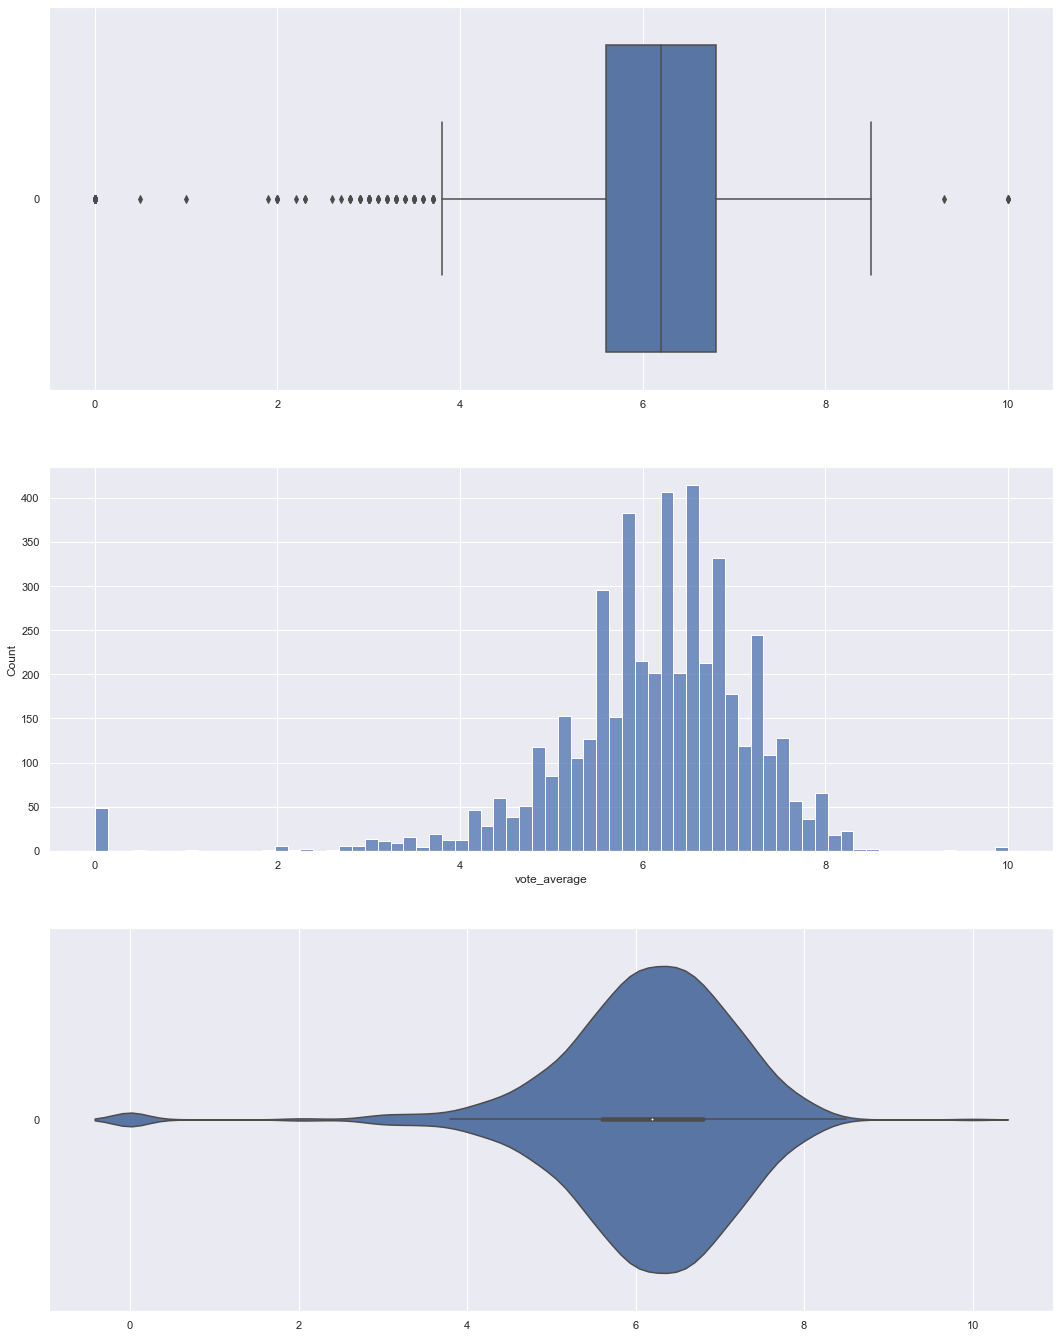

In [21]:
f, axes = plt.subplots(3,figsize=(18, 24))
sb.boxplot(data = num_data, orient = "h", ax = axes[0])
sb.histplot(data = num_data,ax = axes[1])
sb.violinplot(data = num_data, orient = "h", ax = axes[2])

In [22]:
num_data.skew()

-1.8123969688594601

Hence, we can see that the data of vote average is negatively skewed, which means that median is larger than the mean of the data.

Besides, we can observe the **Movie Distribution by Years**.

In [23]:
year = movies_clean['release_year']
year.describe()

count    4775.000000
mean     2002.431623
std        12.427969
min      1916.000000
25%      1999.000000
50%      2005.000000
75%      2011.000000
max      2017.000000
Name: release_year, dtype: float64

<AxesSubplot:xlabel='release_year', ylabel='Count'>

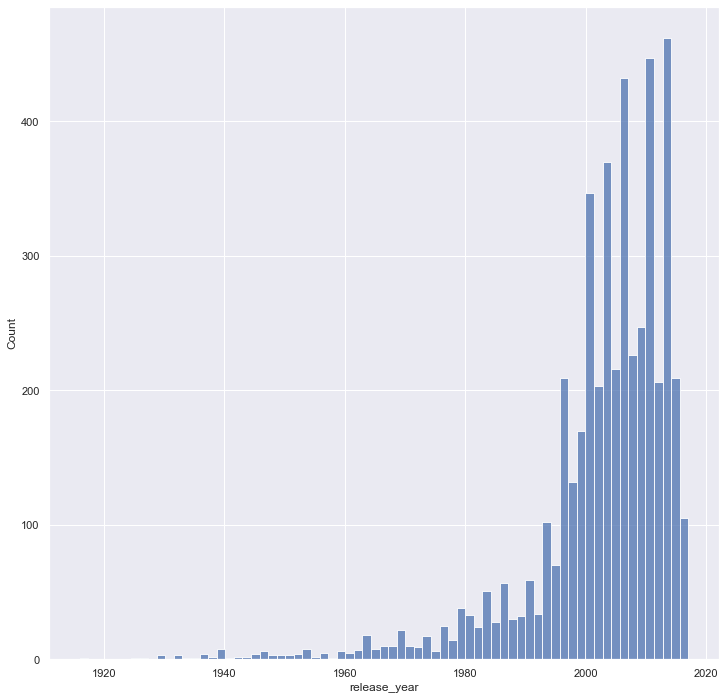

In [24]:
f = plt.subplots(figsize=(12, 12))
sb.histplot(data = year)

### Genre against popularity

First we check for the correlation between popularity, budget and revenue and we plot the heatmap.

            popularity    budget   revenue
popularity    1.000000  0.504032  0.644069
budget        0.504032  1.000000  0.730347
revenue       0.644069  0.730347  1.000000


<AxesSubplot:>

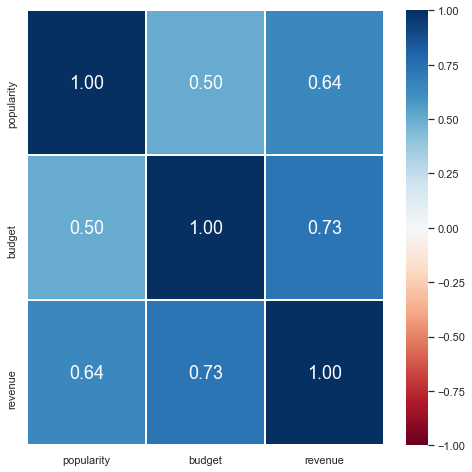

In [25]:
#correlation matrix
popularity_data = pd.DataFrame(movies_clean[["popularity", "budget", "revenue"]])
print(popularity_data.corr())

#heatmap of the matrix
f = plt.figure(figsize=(8, 8))
sb.heatmap(popularity_data.corr(), vmin = -1, vmax = 1, linewidths = 1,
           annot = True, fmt = ".2f", annot_kws = {"size": 18}, cmap = "RdBu")

As you can see budget and revenue has close to a high positive correlation whereas popularity and revenue has a medium positive correlation and finally popularity and budget having an exact medium correlation.

We then plot the scatter and bar plot for each to visualise the correlation

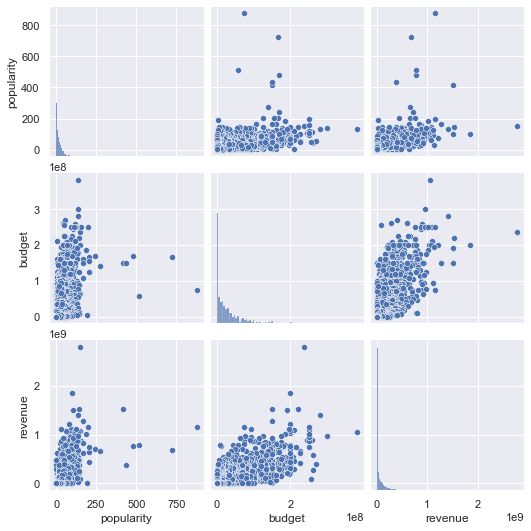

In [26]:
sb.pairplot(data = popularity_data)

Now let us look at the distribution of the variables

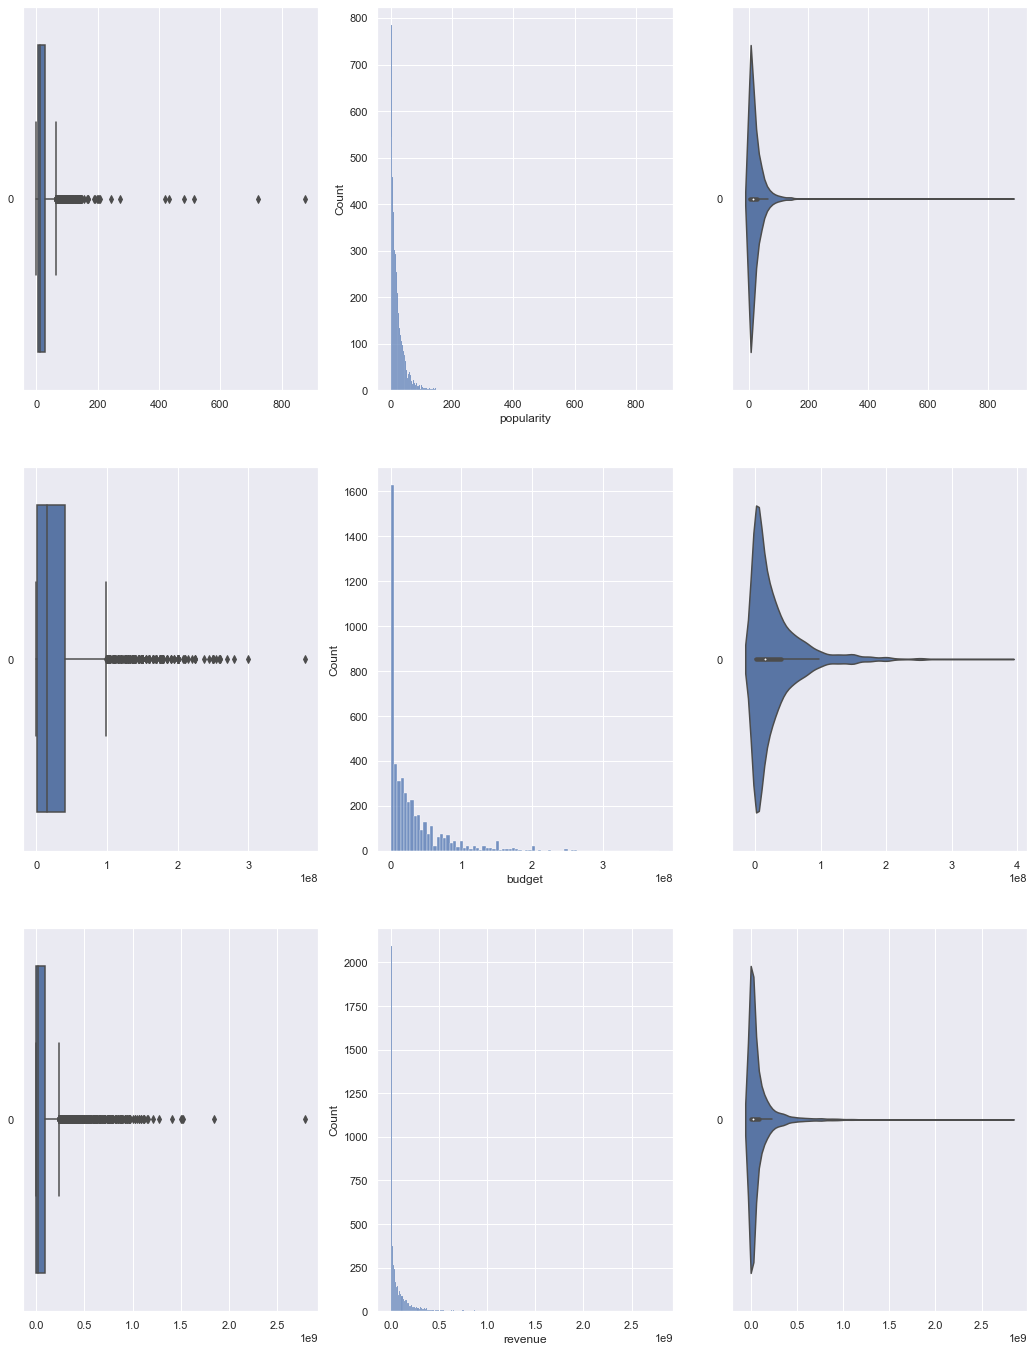

In [27]:
# Draw the distributions of all variables
f, axes = plt.subplots(3, 3, figsize=(18, 24))

count = 0
for var in popularity_data:
    sb.boxplot(data = popularity_data[var], orient = "h", ax = axes[count,0])
    sb.histplot(data = popularity_data[var], ax = axes[count,1])
    sb.violinplot(data = popularity_data[var], orient = "h", ax = axes[count,2])
    count += 1

As seen from above, most of the data is skewed towards the left.

### Categorical Data

Categorical variables chosen here would be **genres** and **original language**.

### Genres

Number of Genres : 20
Drama              1207
Comedy             1042
Action              754
Adventure           339
Horror              300
Crime               195
Thriller            194
Animation           123
Fantasy             117
Romance             106
Science Fiction      96
Documentary          89
Family               56
Mystery              41
Music                34
Western              27
History              25
War                  24
TV Movie              4
Foreign               2
Name: First_genre, dtype: int64


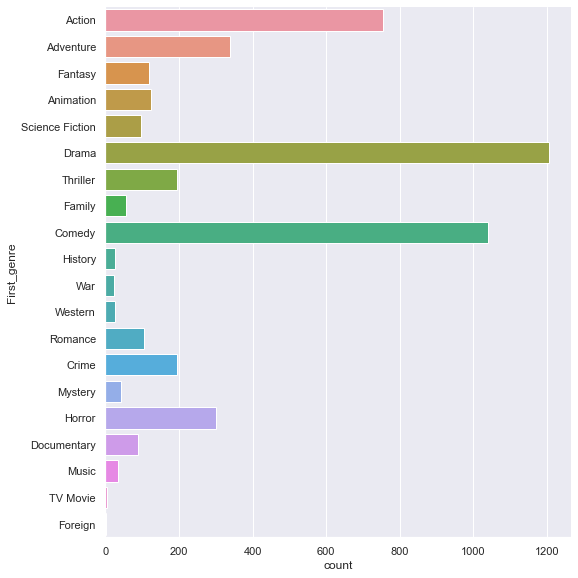

In [28]:
print("Number of Genres :", len(movies_clean["First_genre"].unique()))

genres = pd.value_counts(movies_clean["First_genre"])
print(movies_clean["First_genre"].value_counts())
sb.catplot(y = "First_genre", data = movies_clean, kind = "count", height = 8)

Looking at the result, drama is the highest genre produced by movie producers with comedy in the second and action movie as the third. Let us see a histogram plot of genres against release year.

Text(0, 0.5, 'Count')

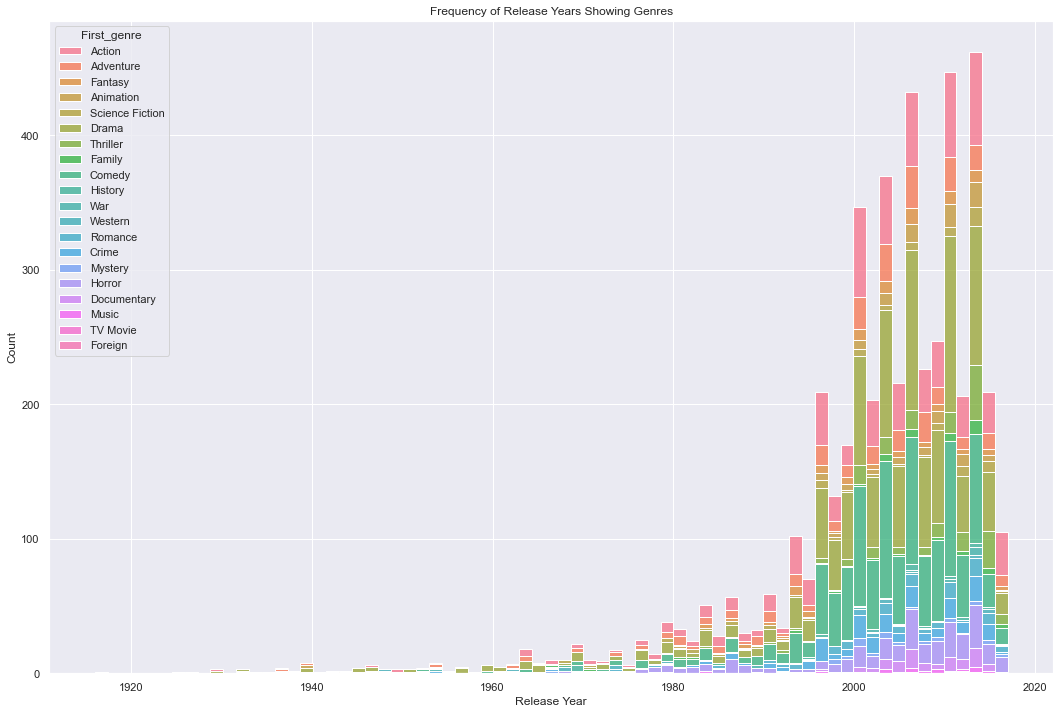

In [29]:
fig, ax = plt.subplots(figsize=(18,12))

sb.histplot(x = 'release_year', hue = 'First_genre', data = movies_clean, multiple = 'stack')
plt.title('Frequency of Release Years Showing Genres')
plt.xlabel('Release Year')
plt.ylabel('Count')

As shown in the graph, **Drama** is the most produced movie genre over years.

### Original language

Number of languages : 37
en    4477
fr      70
es      32
zh      27
de      27
hi      19
ja      16
it      14
cn      12
ko      11
ru      11
pt       9
da       7
sv       5
nl       4
fa       4
th       3
he       3
ar       2
ta       2
cs       2
ro       2
id       2
ps       1
pl       1
nb       1
af       1
ky       1
xx       1
el       1
te       1
tr       1
vi       1
no       1
sl       1
is       1
hu       1
Name: original_language, dtype: int64


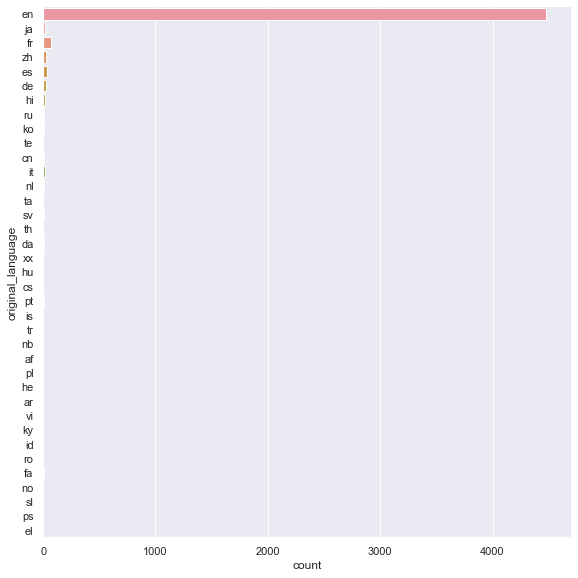

In [30]:
print("Number of languages :", len(movies_clean["original_language"].unique()))

# Pokemons in each Generation
print(movies_clean["original_language"].value_counts())
sb.catplot(y = "original_language", data = movies_clean, kind = "count", height = 8)

Text(0, 0.5, 'Count')

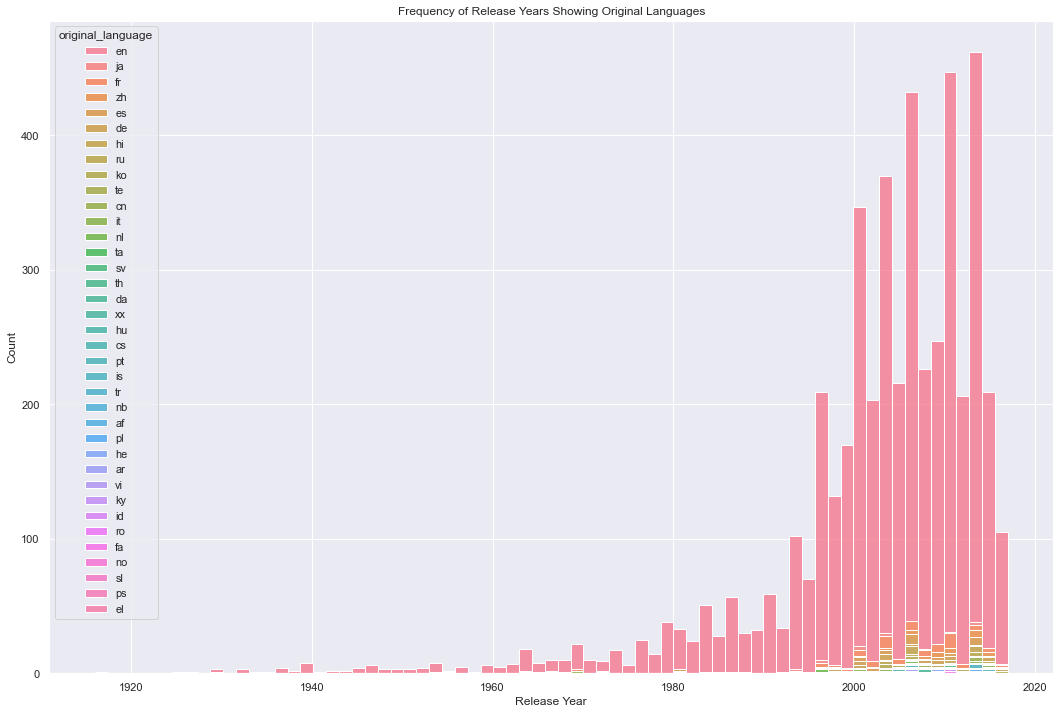

In [31]:
fig, ax = plt.subplots(figsize=(18,12))

sb.histplot(x = 'release_year', hue = 'original_language', data = movies_clean, multiple = 'stack')
plt.title('Frequency of Release Years Showing Original Languages')
plt.xlabel('Release Year')
plt.ylabel('Count')

As shown in the graph, most of the movies use english as their main language.

### Distribution Between Genres and the Original Language

<AxesSubplot:xlabel='First_genre', ylabel='original_language'>

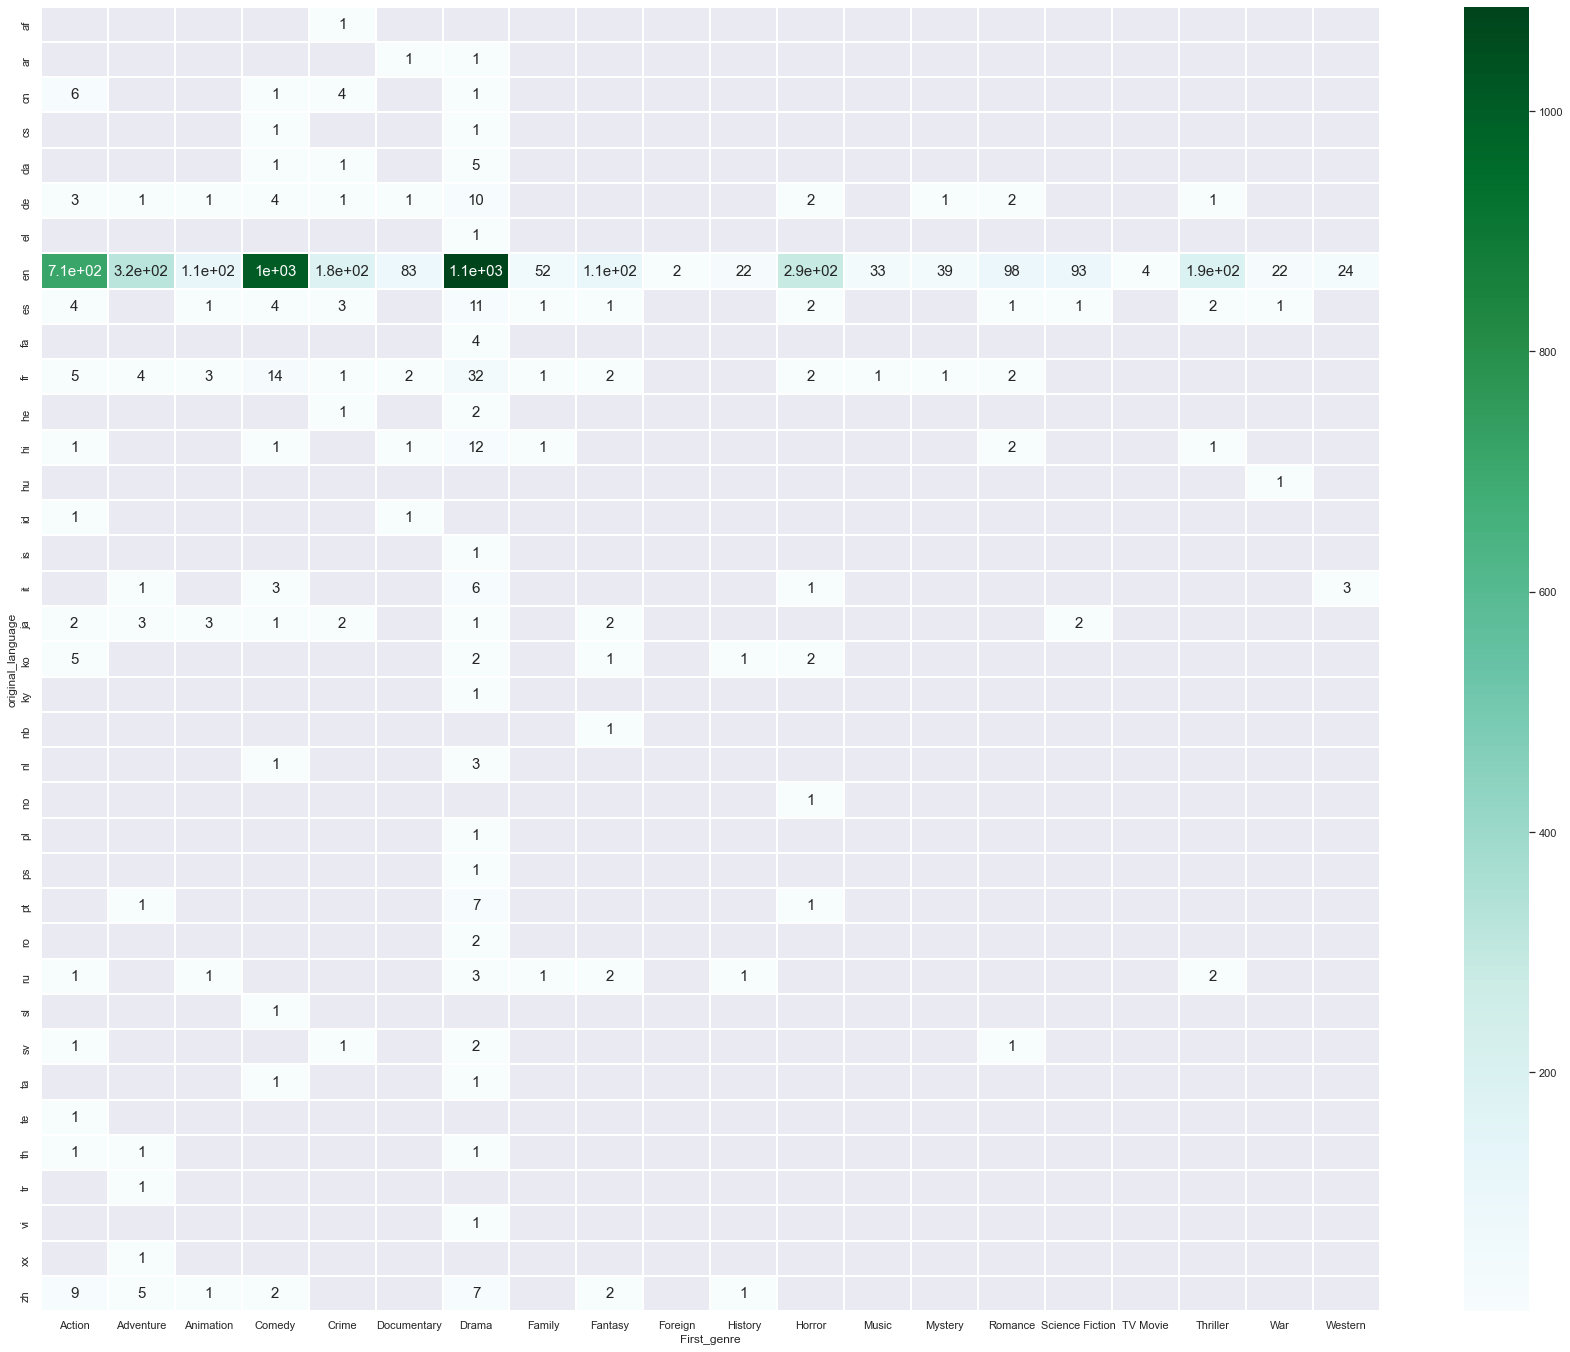

In [32]:
f = plt.figure(figsize=(30, 30))
sb.heatmap(movies_clean.groupby(['original_language', 'First_genre']).size().unstack(), 
           linewidths = 1, annot = True, annot_kws = {"size": 15}, cmap = "BuGn")

## 4. Preparation for Machine Learning

## Getting Top 5 Genres from The Dataset

After doing a deep data exploration, we found out that the data is unbalanced. In fact, the total number of movies with the top 2 genres is Drama and Comedy, which takes around `47.10%` of the dataset. Hence, we only take the data that accounts for **more than 5%** of the total number of dataset.

` 4803 * 0.05 = 240.15 `

Therefore, we will be using the movie genres with more than **240 entries** for the machine learning process. If there are too few data points, the accuracy of predicting the correct genre will be much lower and the most frequent words will be less. Hence, we only take the **Top 5** genres which have more than 240 movies.

In [33]:
top_genres = pd.DataFrame(genres[:5]).reset_index()
top_genres.columns = ['genres', 'number_of_movies']
top_genres

,genres,number_of_movies
0,Drama,1207
1,Comedy,1042
2,Action,754
3,Adventure,339
4,Horror,300


C:\Users\anson\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'frequency')

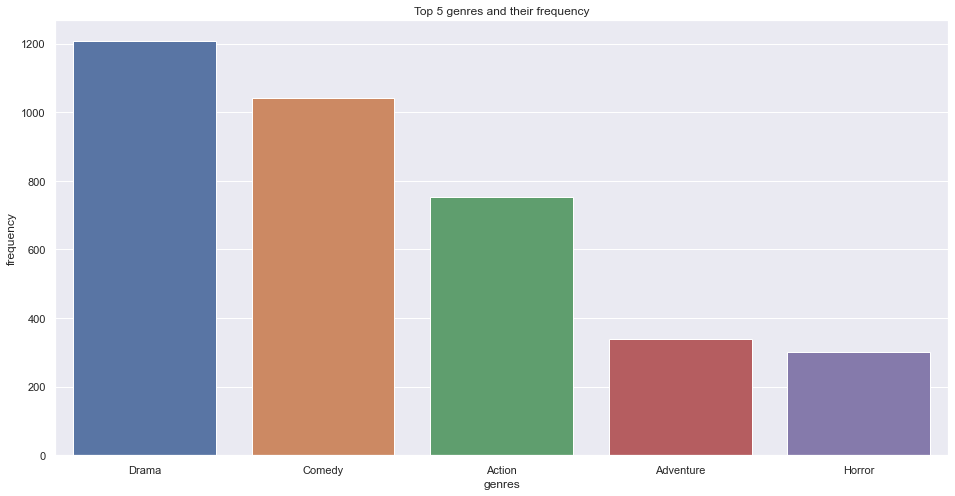

In [34]:
f, axes = plt.subplots(figsize=(16,8))

sb.barplot(top_genres['genres'], top_genres['number_of_movies'])
plt.title('Top 5 genres and their frequency')
plt.xlabel('genres')
plt.ylabel('frequency')

#### Create a seperate label column to assign the genres with number 1 to 5 for the genres Drama, Comedy, Action, Adventure etc.

In [35]:
genres = [movies_clean["First_genre"]=="Drama", movies_clean['First_genre']=='Comedy', movies_clean["First_genre"]=="Action", 
          movies_clean['First_genre']=="Adventure", movies_clean['First_genre']=='Horror'] 

numbers = [1,2,3,4,5]
movies_clean['labels'] = np.select(genres, numbers,0)
movies_clean

,budget,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,First_genre,release_year,labels
0,237000000,http://www.avatarmovie.com/,19995,"{id: 1463, name: culture clash}, {id: 2964, na...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"{name: Ingenious Film Partners, id: 289}, {nam...","{iso_3166_1: US, name: United States of Americ...",...,162.0,"{iso_639_1: en, name: English}, {iso_639_1: es...",Released,Enter the World of Pandora.,Avatar,7.2,11800,Action,2009,3
1,300000000,http://disney.go.com/disneypictures/pirates/,285,"{id: 270, name: ocean}, {id: 726, name: drug a...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"{name: Walt Disney Pictures, id: 2}, {name: Je...","{iso_3166_1: US, name: United States of America}",...,169.0,"{iso_639_1: en, name: English}",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,Adventure,2007,4
2,245000000,http://www.sonypictures.com/movies/spectre/,206647,"{id: 470, name: spy}, {id: 818, name: based on...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"{name: Columbia Pictures, id: 5}, {name: Danja...","{iso_3166_1: GB, name: United Kingdom}, {iso_3...",...,148.0,"{iso_639_1: fr, name: Fran\u00e7ais}, {iso_639...",Released,A Plan No One Escapes,Spectre,6.3,4466,Action,2015,3
3,250000000,http://www.thedarkknightrises.com/,49026,"{id: 849, name: dc comics}, {id: 853, name: cr...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"{name: Legendary Pictures, id: 923}, {name: Wa...","{iso_3166_1: US, name: United States of America}",...,165.0,"{iso_639_1: en, name: English}",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,Action,2012,3
4,260000000,http://movies.disney.com/john-carter,49529,"{id: 818, name: based on novel}, {id: 839, nam...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"{name: Walt Disney Pictures, id: 2}","{iso_3166_1: US, name: United States of America}",...,132.0,"{iso_639_1: en, name: English}",Released,"Lost in our world, found in another.",John Carter,6.1,2124,Action,2012,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4797,0,NaN,67238,NaN,en,Cavite,"Adam, a security guard, travels from Californi...",0.022173,NaN,NaN,...,80.0,NaN,Released,NaN,Cavite,7.5,2,Foreign,2005,0
4798,220000,NaN,9367,"{id: 5616, name: united states\u2013mexico bar...",es,El Mariachi,El Mariachi just wants to play his guitar and ...,14.269792,"{name: Columbia Pictures, id: 5}","{iso_3166_1: MX, name: Mexico}, {iso_3166_1: U...",...,81.0,"{iso_639_1: es, name: Espa\u00f1ol}",Released,"He didn't come looking for trouble, but troubl...",El Mariachi,6.6,238,Action,1992,3
4799,9000,NaN,72766,NaN,en,Newlyweds,A newlywed couple's honeymoon is upended by th...,0.642552,NaN,NaN,...,85.0,NaN,Released,A newlywed couple's honeymoon is upended by th...,Newlyweds,5.9,5,Comedy,2011,2
4800,0,http://www.hallmarkchannel.com/signedsealeddel...,231617,"{id: 248, name: date}, {id: 699, name: love at...",en,"Signed, Sealed, Delivered","Signed, Sealed, Delivered introduces a dedicat...",1.444476,"{name: Front Street Pictures, id: 3958}, {name...","{iso_3166_1: US, name: United States of America}",...,120.0,"{iso_639_1: en, name: English}",Released,NaN,"Signed, Sealed, Delivered",7.0,6,Comedy,2013,2


In [36]:
movies_clean["labels"].value_counts()

1    1207
0    1133
2    1042
3     754
4     339
5     300
Name: labels, dtype: int64

Next, we remove the movies with the genres not in the top 5 genres stated above.

In [37]:
movies_final = (movies_clean.loc[movies_clean['labels']!=0]).reset_index(drop = True)
movies_final

,budget,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,First_genre,release_year,labels
0,237000000,http://www.avatarmovie.com/,19995,"{id: 1463, name: culture clash}, {id: 2964, na...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"{name: Ingenious Film Partners, id: 289}, {nam...","{iso_3166_1: US, name: United States of Americ...",...,162.0,"{iso_639_1: en, name: English}, {iso_639_1: es...",Released,Enter the World of Pandora.,Avatar,7.2,11800,Action,2009,3
1,300000000,http://disney.go.com/disneypictures/pirates/,285,"{id: 270, name: ocean}, {id: 726, name: drug a...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"{name: Walt Disney Pictures, id: 2}, {name: Je...","{iso_3166_1: US, name: United States of America}",...,169.0,"{iso_639_1: en, name: English}",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,Adventure,2007,4
2,245000000,http://www.sonypictures.com/movies/spectre/,206647,"{id: 470, name: spy}, {id: 818, name: based on...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"{name: Columbia Pictures, id: 5}, {name: Danja...","{iso_3166_1: GB, name: United Kingdom}, {iso_3...",...,148.0,"{iso_639_1: fr, name: Fran\u00e7ais}, {iso_639...",Released,A Plan No One Escapes,Spectre,6.3,4466,Action,2015,3
3,250000000,http://www.thedarkknightrises.com/,49026,"{id: 849, name: dc comics}, {id: 853, name: cr...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"{name: Legendary Pictures, id: 923}, {name: Wa...","{iso_3166_1: US, name: United States of America}",...,165.0,"{iso_639_1: en, name: English}",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,Action,2012,3
4,260000000,http://movies.disney.com/john-carter,49529,"{id: 818, name: based on novel}, {id: 839, nam...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"{name: Walt Disney Pictures, id: 2}","{iso_3166_1: US, name: United States of America}",...,132.0,"{iso_639_1: en, name: English}",Released,"Lost in our world, found in another.",John Carter,6.1,2124,Action,2012,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3637,0,NaN,182291,"{id: 718, name: confession}, {id: 10079, name:...",en,On The Downlow,Isaac and Angel are two young Latinos involved...,0.029757,"{name: Iconoclast Films, id: 26677}","{iso_3166_1: US, name: United States of America}",...,90.0,NaN,Released,Two gangs. One secret. One crossroad.,On The Downlow,6.0,2,Drama,2004,1
3638,0,NaN,124606,"{id: 10726, name: gang}, {id: 33928, name: aud...",en,Bang,A young woman in L.A. is having a bad day: she...,0.918116,"{name: Asylum Films, id: 10571}, {name: FM Ent...","{iso_3166_1: US, name: United States of America}",...,98.0,"{iso_639_1: en, name: English}",Released,Sometimes you've got to break the rules,Bang,6.0,1,Drama,1995,1
3639,220000,NaN,9367,"{id: 5616, name: united states\u2013mexico bar...",es,El Mariachi,El Mariachi just wants to play his guitar and ...,14.269792,"{name: Columbia Pictures, id: 5}","{iso_3166_1: MX, name: Mexico}, {iso_3166_1: U...",...,81.0,"{iso_639_1: es, name: Espa\u00f1ol}",Released,"He didn't come looking for trouble, but troubl...",El Mariachi,6.6,238,Action,1992,3
3640,9000,NaN,72766,NaN,en,Newlyweds,A newlywed couple's honeymoon is upended by th...,0.642552,NaN,NaN,...,85.0,NaN,Released,A newlywed couple's honeymoon is upended by th...,Newlyweds,5.9,5,Comedy,2011,2


In [38]:
movies_final.shape

(3642, 21)

As you can see, **1133** movies with the label "0" is removed.

Finally, we display the table of the genres with its assigned value in the labels.

In [39]:
genres = [top_genres["genres"]=="Drama", top_genres["genres"]=='Comedy', top_genres["genres"]=="Action", 
          top_genres["genres"]=="Adventure", top_genres["genres"]=='Horror']

numbers = [1,2,3,4,5]
top_genres['labels'] = np.select(genres, numbers)
top_genres

,genres,number_of_movies,labels
0,Drama,1207,1
1,Comedy,1042,2
2,Action,754,3
3,Adventure,339,4
4,Horror,300,5


### Drop Unnecessary Columns

In [40]:
movies_final.drop(columns = ['budget','homepage','id','keywords','original_language','original_title','popularity','production_companies','production_countries','runtime','spoken_languages','status','tagline','title','vote_average','vote_count','release_year','revenue'], axis = 1, inplace = True)
movies_final

,overview,First_genre,labels
0,"In the 22nd century, a paraplegic Marine is di...",Action,3
1,"Captain Barbossa, long believed to be dead, ha...",Adventure,4
2,A cryptic message from Bond’s past sends him o...,Action,3
3,Following the death of District Attorney Harve...,Action,3
4,"John Carter is a war-weary, former military ca...",Action,3
...,...,...,...
3637,Isaac and Angel are two young Latinos involved...,Drama,1
3638,A young woman in L.A. is having a bad day: she...,Drama,1
3639,El Mariachi just wants to play his guitar and ...,Action,3
3640,A newlywed couple's honeymoon is upended by th...,Comedy,2


### Cleaning of the "Overview" column to prepare for analysis

Let us look on an example:

In [41]:
movies_final['overview'][2]

'A cryptic message from Bond’s past sends him on a trail to uncover a sinister organization. While M battles political forces to keep the secret service alive, Bond peels back the layers of deceit to reveal the terrible truth behind SPECTRE.'

For the analysis of the plot summaries, many of the words are very common but contain not much meaning so it is not useful for the analysing of data. In this case, we will import `stopwords` from `nltk` library. If we find some words that are not useful, we add it in the stopwords list. We also change the words into lower case, remove the stopwords and lemmatising.

In [42]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
from nltk.stem.porter import PorterStemmer

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\anson\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\anson\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


In [43]:
stopwords_list = stopwords.words('english')
stopwords_list += list(string.punctuation)
stopwords_list += ['one', 'two', 'go','goes', 'get', 'also', 'however', 'tells','to','find','finds','must','new','world','man',
                  'life','year','years','old','family','young','home','three','takes','take','story','father','becomes','become',
                  'help','helps','friends','friend','lives','mother','woman','man','back','time','war'] 
stopwords_list += [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

#Function to clean the words and the stopwords
def clean_text(text):
    text = text.lower() # change the words to lowercase
    text = re.sub(r"what's", "what is ", text) # remove contractions
    text = re.sub(r"\'s", " ", text)
    text = re.sub(r"\'ve", " have ", text)
    text = re.sub(r"can't", "can not ", text)
    text = re.sub(r"n't", " not ", text)
    text = re.sub(r"\'re", " are ", text)
    text = re.sub(r"\'d", " would ", text)
    text = re.sub(r"\'ll", " will ", text)
    text = re.sub(r"\'scuse", " excuse ", text)
    text = re.sub('\W', ' ', text)
    text = re.sub('\s+', ' ', text)
    text = re.sub('\d+', ' ', text)
    text = word_tokenize(text) # change the words into tokens / words in a list
    #text = [ps.stem(w) for w in text]
    text = [w for w in text if w not in stopwords_list]
    text = ' '.join(text) # rejoin the words into a string
    return text

In [44]:
## copy a new dataframe 
movies_final_clean = movies_final.copy(deep = True)
movies_final_clean.dropna(subset=['overview'], inplace = True)
movies_final_clean

,overview,First_genre,labels
0,"In the 22nd century, a paraplegic Marine is di...",Action,3
1,"Captain Barbossa, long believed to be dead, ha...",Adventure,4
2,A cryptic message from Bond’s past sends him o...,Action,3
3,Following the death of District Attorney Harve...,Action,3
4,"John Carter is a war-weary, former military ca...",Action,3
...,...,...,...
3637,Isaac and Angel are two young Latinos involved...,Drama,1
3638,A young woman in L.A. is having a bad day: she...,Drama,1
3639,El Mariachi just wants to play his guitar and ...,Action,3
3640,A newlywed couple's honeymoon is upended by th...,Comedy,2


In [45]:
# Function to clean the text and remove the stopwords
movies_final_clean['overview'] = movies_final_clean['overview'].map(lambda x : clean_text(x))
movies_final_clean['overview'][2]

'cryptic message bond past sends trail uncover sinister organization battles political forces keep secret service alive bond peels layers deceit reveal terrible truth behind spectre'

As you can see, the stopwords have been removed.

## Distribution of Words in Overview for Each Genres

For this section, we use the `CountVectorizer` method to count the words and display top 30 words in the `Wordcloud` in the overview for each genre.

If there is some words which are repeated in the WordCloud, the words will be added into the stopwords list above and the WordCloud is ran again. Hence, the process is a repeating process.

### Drama

In [46]:
drama_plot = movies_final_clean.loc[movies_final_clean['labels'] == 1, ['overview']] # locate drama overviews in the dataframe
drama_plotlist = [x for x in drama_plot['overview'].str.split()] 
drama_plotlist = list(itertools.chain(*drama_plotlist)) 

count = CountVectorizer()
docs       = count.fit_transform(drama_plotlist) 
features   = count.get_feature_names() # run and count the frequency of words

plot_corpus = ' '.join(drama_plotlist)
plot_wordcloud = WordCloud(stopwords=STOPWORDS, background_color='black', max_words = 30, height=2000, width=4000, random_state = 42, 
                           normalize_plurals = False).generate(plot_corpus)

# Plot the wordcloud
fig, ax = plt.subplots(figsize=(16,8))
plt.imshow(plot_wordcloud)
plt.axis('off')
plt.title('Most Frequent Words in the Movie Plot For Drama', fontsize = 20)
plt.show()

NameError: name 'WordCloud' is not defined

### Comedy

In [ ]:
comedy_plot = movies_final_clean.loc[movies_final_clean['labels'] == 2, ['overview']]
comedy_plotlist = [x for x in comedy_plot['overview'].str.split()]
comedy_plotlist = list(itertools.chain(*comedy_plotlist))

count = CountVectorizer()
docs       = count.fit_transform(comedy_plotlist)
features   = count.get_feature_names()

plot_corpus = ' '.join(comedy_plotlist)
plot_wordcloud = WordCloud(stopwords=STOPWORDS, background_color='black', max_words = 30, height=2000, width=4000, random_state = 42, 
                           normalize_plurals = False).generate(plot_corpus)

# Plot the wordcloud
fig, ax = plt.subplots(figsize=(16,8))
plt.imshow(plot_wordcloud)
plt.axis('off')
plt.title('Most Frequent Words in the Movie Plot For Comedy', fontsize = 20)
plt.show()

### Action

In [ ]:
action_plot = movies_final_clean.loc[movies_final_clean['labels'] == 3, ['overview']]
action_plotlist = [x for x in action_plot['overview'].str.split()]
action_plotlist = list(itertools.chain(*action_plotlist))

count = CountVectorizer()
docs       = count.fit_transform(action_plotlist)
features   = count.get_feature_names()

plot_corpus = ' '.join(action_plotlist)
plot_wordcloud = WordCloud(stopwords=STOPWORDS, background_color='black', max_words = 30, height=2000, width=4000, random_state = 42, 
                           normalize_plurals = False).generate(plot_corpus)

# Plot the wordcloud
fig, ax = plt.subplots(figsize=(16,8))
plt.imshow(plot_wordcloud)
plt.axis('off')
plt.title('Most Frequent Words in the Movie Plot For Action', fontsize = 20)
plt.show()

### Adventure

In [ ]:
adventure_plot = movies_final_clean.loc[movies_final_clean['labels'] == 4, ['overview']]
adventure_plotlist = [x for x in adventure_plot['overview'].str.split()]
adventure_plotlist = list(itertools.chain(*adventure_plotlist))

count = CountVectorizer()
docs       = count.fit_transform(adventure_plotlist)
features   = count.get_feature_names()

plot_corpus = ' '.join(adventure_plotlist)
plot_wordcloud = WordCloud(stopwords=STOPWORDS, background_color='black', max_words = 30, height=2000, width=4000, random_state = 42, 
                           normalize_plurals = False).generate(plot_corpus)

# Plot the wordcloud
fig, ax = plt.subplots(figsize=(16,8))
plt.imshow(plot_wordcloud)
plt.axis('off')
plt.title('Most Frequent Words in the Movie Plot For Adventure', fontsize = 20)
plt.show()

### Horror

In [ ]:
horror_plot = movies_final_clean.loc[movies_final_clean['labels'] == 5, ['overview']]
horror_plotlist = [x for x in horror_plot['overview'].str.split()]
horror_plotlist = list(itertools.chain(*horror_plotlist))

count = CountVectorizer()
docs       = count.fit_transform(horror_plotlist)
features   = count.get_feature_names()

plot_corpus = ' '.join(horror_plotlist)
plot_wordcloud = WordCloud(stopwords=STOPWORDS, background_color='black', max_words = 30, height=2000, width=4000, random_state = 42, 
                           normalize_plurals = False).generate(plot_corpus)

# Plot the wordcloud
fig, ax = plt.subplots(figsize=(16,8))
plt.imshow(plot_wordcloud)
plt.axis('off')
plt.title('Most Frequent Words in the Movie Plot For Horror', fontsize = 20)
plt.show()

## 5. Machine Learning

### Dummy Classifier

Let us start with Dummy Classifier where it is a classifier model which makes predictions without finding out the trend of the data. Dummy Classifier just predict the most frequent class in the dataset.

In [ ]:
from sklearn.dummy import DummyClassifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

#split into train and test dataset
X = movies_final_clean['overview']
y = movies_final_clean['labels']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

In [ ]:
#establishing random_state for reproducibility
dummy = DummyClassifier()  

# fit and train the dummy classifier model
dummy.fit(X_train, y_train)

# predict the genres from the x values
y_pred = dummy.predict(X_test)

print("Accuracy score of train: ", dummy.score(X_train,y_train))
print("Accuracy score of test: ", dummy.score(y_pred, y_test))

# plot the confusion matrix
sb.heatmap(confusion_matrix(y_test, y_pred), 
          annot = True, fmt=".0f", annot_kws={"size": 10})

# store the accuracy
dummy_ac = dummy.score(y_pred, y_test)

### Gaussian Naive Bayes

For **Gaussian Naive Bayes** model, we will first use the `CountVectorizer` to create a bag of words and transform it into an array and calculate the probability of words internally.

In [ ]:
#split x and y
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

# Use countVectorizer for the calculation and transformation
countvec = CountVectorizer(ngram_range = (1,3), max_features = 10000)
CVec_Xtrain = countvec.fit_transform(X_train)
CVec_Xtest = countvec.fit_transform(X_test)

In [ ]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(CVec_Xtrain.todense())
X_test = sc.transform(CVec_Xtest.todense())

# Training the Naive Bayes model on the Training set
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Print the accuracy score and make the Confusion Matrix
from sklearn.metrics import confusion_matrix, accuracy_score
print("Accuracy score of test: ", classifier.score(X_test,y_test))
sb.heatmap(confusion_matrix(y_test, y_pred), 
          annot = True, fmt=".0f", annot_kws={"size": 10})

# Store the accuracy score
NB_ac = classifier.score(X_test,y_test)

### Logistic Regression

For **Logistic Regression**, we also use the `countVectorizer` method using the train-test set that is prepared above.

In [ ]:
# import logistic regression library
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()

# train the logistic regression model
logreg.fit(CVec_Xtrain, y_train)

# predict the result
y_pred = logreg.predict(CVec_Xtest)

# print the accuracy score
print("Accuracy score of test: ", logreg.score(CVec_Xtest,y_test))

# create the confusion matrix
sb.heatmap(confusion_matrix(y_test, y_pred), 
          annot = True, fmt=".0f", annot_kws={"size": 10})

# store the accuracy result
logreg_ac = logreg.score(CVec_Xtest,y_test)

### Compare the results of the three models

In [ ]:
# create the data list
data = {'Model': ['Dummy', 'Gaussian Naive Bayes', 'Logistic Regression'], 'Accuracy': [dummy_ac, NB_ac, logreg_ac]}  
  
# Create DataFrame  
model = pd.DataFrame(data)  
  
model

In [ ]:
# Function to show values on barplot
def show_values(axs, orient="v", space=.01):
    def _single(ax):
        if orient == "v":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() / 2
                _y = p.get_y() + p.get_height() + (p.get_height()*0.01)
                value = '{:.4f}'.format(p.get_height())
                ax.text(_x, _y, value, ha="center") 
        elif orient == "h":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() + float(space)
                _y = p.get_y() + p.get_height() - (p.get_height()*0.5)
                value = '{:.4f}'.format(p.get_width())
                ax.text(_x, _y, value, ha="left")

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _single(ax)
    else:
        _single(axs)
        

model_bar = sb.barplot(x='Model', y='Accuracy', data=model)
show_values(model_bar)

## 6. Insight and Conclusion

### Why is the accuracy of the model so low?

After considering the problem, we have come out with some reasons:

* The dataset is considered small as it contains only around 4800 entries. After data cleaning, there is only around 4000 data which is considered a small dataset. 
* The data is actually unbalanced where the number of movies for the top 2 genres is around 42% of whole dataset. Hence, it is hard to analyse the other genres since the entries are quite less compared to the top 2 genres. 
* There may be repeating words between the genres causing wrong classification between genres 
* Some words or sentences may contain more than one meaning where natural language processing cannot capture it.

## Conclusion

* The accuracy of the three models are around 30%, with the highest at 33.04%.
* The problem of having low accuracy is because of the dataset is small and the data is quite unbalanced.
* Dummy Classifier actually performed the best compared to other two machine learning technique due to the unbalance data. Since Dummy Classifier uses the strategy of the most frequency genre, it has a higher percentage of getting the top 2 genres hence the highest accuracy.
* Logistic Regression model performs better than the Gaussian Naive Bayes model with the accuracy almost identical to the accuracy of the Dummy Classifier.
* The confusion matrix plotted confirms the problem where there are many common words among the genres.
* Due to the fact that some of the genres had words in common, false classifications occurs most on the genres which have more common words among them.
* Although the accuracy is low, which is at 33.04%, it is still higher than the probability of randomly classifying a movie into one of the genre which is 20%.
* NLTK library is a very powerful library that allows us to analyse words which is considered as unclassified data.
* Natural language processing (NLP) is a very interesting technique to learn and it may be possible to have a higher accuracy to predict the genres if the dataset is large enough.

## What have we learnt from this project?

* Data cleaning using the method of split by delimiters
* Transforming unstructured data (natural language) into structured data using CountVectorizer
* Using NLTK library methods such as Stopwords
* Generating WordClouds
* Dummy Classifier, Gaussian Naive Bayes Model and Logistic Regression Model from Sklearn
* Exploratory Data Analysis on Categorical Data
* Collaboration using GitHub